# Exercices - EDO
## Exercice 1 Mise en evidence numerique de l'ordre des methodes d'Euler

On considère le problème suivant :
$$
(1)\qquad \left\{ \begin{array}{l l}
x'(t) = 5x(t) - 6y(t),\\
y′(t) = 3x(t) -4 y(t)
\end{array} \right.
$$
sur l’intervalle $[0,1]$ avec la condition initiale $x(0) = 1$ et $y(0) = 0$, où on a utilisé la notation $f'=\frac{df}{dt}$.

__1.__ Faire un programme afin de déterminer la solution approchée de ce système à l’aide d’un schéma d’Euler explicite (sans utiliser de routines de `scipy`)

__2.__ En prenant un pas de temps $\Delta t= 0.01$, tracer la solution approchée obtenue à la question 1. de ce système en fonction du temps.

Vous pourrez reprendre et modifier le code ci-dessous pour la représentation graphique de courbes en 3d. Ce code represente la courbe $\{(t,\cos(t),\sin(t))\}_{0\leq t \leq 10}$.

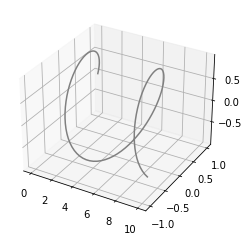

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Une fois ce sous-module importé, un repère 3-d peut etre créé
                                           # en inserant "projection='3d'" dans une routine de creation de repere
ax1 = plt.axes(projection='3d')
t1 = np.linspace(0,10,100)
y1 = np.cos(t1)
z1 = np.sin(t1)
ax1.plot3D(t1,y1,z1, 'gray')

__3.__ On rappelle que la solution exacte de (1) est donnée par $X(t)=(x(t),y(t))$ où $x(t) = 2e^{2t}-e^{-t}$ et $y(t) = e^{2t}-e^{-t}$. Comparer graphiquement la solution exacte et la solution approchée pour différentes valeurs de $\Delta t=1/K$.

__4.__ Pour $0 \leq k \leq K$, on note $t_k = k\Delta t$ les points de discrétisation et $X_k$ la solution approchée au temps $t_k$. Écrire un programme calculant l’erreur $e(\Delta t)=\max_{0\leq k\leq K}\|X(t_k) − X_k\|$. On pourra utiliser les fonctions `numpy.linalg.norm` et `numpy.max`.

__5.__ Tracer l’erreur $e(\Delta t)$ en fonction de $\Delta t$ pour $\Delta=1,\frac{1}{2},\frac{1}{3},...,\frac{1}{100}$ en échelle logarithmique. Vous pourrez utiliser la fonction `loglog` de pyplot qui a déjà été rencontrée dans le cours "Intégration".

__6.__ Utiliser la commande `np.polyfit` (ou bien programmer vous même les moindres carrés) pour déterminer la droite qui approche au sens des moindres carrés la courbe de la fonction $\Delta t\mapsto e(\Delta t)$ pour les valeurs $\Delta t=1,\frac 12,\frac 13,...,\frac{1}{100}$ tracée à la question __4.__ (cette fonction a déjà été rencontrée dans le cours "Approximation de fonctions"). Quel est son coefficient directeur ? En déduire que numériquement on constate que la méthode d'Euler explicite est d'ordre 1.

__7. (Question facultative)__ Reprendre les questions précédente mais en mettant en application le schéma d'Euler implicite. Notez qu'il n'y a pas besoin d'algorithme type Newton-Raphson ici, car l'équation $X_{k+1}=X_k+\Delta t f(X_{k+1})$ avec $f(x,y)=(5x-6y,3x-4y)$ peut etre resolue explicitement puisque $f$ est linéaire.

## Exercice 2 Theorie des jeux evolutive

Cet exercice s'inspire de l'article "Survival of dominated strategies under evolutionary dynamics", par J. Hofbauer et W. Sandholm, Theoretical Economics (2011).

Les individus d'une population choisissent différentes stratégies économiques, dénotées stratégies $0$ à $n-1$. La proportion d'individus dans la population ayant choisi la stratégie $0\leq i\leq n-1$ est notée $x_i$. Le vecteur $x=(x_0,...,x_{n-1})$ représente ainsi les proportions de la population ayant choisi chaque stratégie. L'ensemble des répartitions de stratégies possibles dans la population est $E=\{x\in \mathbb R^n, \ x_i\geq 0 \ \mbox{pour }0\leq i \leq n-1 \mbox{ et }\sum_{i=0}^{n-1}x_i=1\}$.

Pour une répartition des stratégies dans la population $x\in E$, un individu ayant choisi la stratégie $i$ va recevoir le gain $F_i(x)$ (qui peut être positif ou négatif). On suppose donc une fonction des gains $F:x\mapsto F(x)=(F_0(x),...,F_{n-1}(x))$ donnée.

Par exemple, dans le cas du jeux "pierre, papier, ciseaux", on considère que la stratégie $0$ est de jouer pierre, la stratégie $1$ de jouer papier et la stratégie $2$ est de jouer ciseaux. Pour un $x=(x_0,x_1,x_2)\in E$, la proportion de la population qui joue pierre est $x_0$. La fonction des gains pour ce jeu est
$$
(2)\qquad F_{ppc}(x)=\begin{pmatrix} 0&-1&1 \\ 1 & 0 & -1 \\ -1 & 1 & 0 \end{pmatrix}\begin{pmatrix}x_0\\x_1\\x_2 \end{pmatrix}
$$
L'explication est qu'un individu ayant adopté la stratégie pierre $0$, va jouer contre un nombre d'individus assez grand pour être représentatif de la population, et gagner lorsqu'il rencontre un individu qui joue ciseaux $2$ ou perdre contre un individu qui joue feuille $1$, et que son gain est donc de $x_2-x_1$.

On considère de plus le cas où les individus peuvent changer de stratégie au cours du temps. À un instant $t$, la répartition des stratégies dans la population est $x(t)$ et la répartition des gains correspondante est $F(x(t))$. On considère le modèle de Smith pour le changement de stratégies. Étant données deux stratégies $i$ et $j$, et supposant que la stratégie $i$ a rapporté plus que la stratégie $j$: $F_i(x)-F_j(x)\geq 0$, alors aucun des individus ayant choisi la stratégie $i$ ne va changer pour la stratégie $j$, et une fraction des individus ayant choisi la stratégie $j$ proportionnelle à la différence de gain $F_i(x)-F_j(x)$ va changer et adopter la stratégie $i$. On a donc :
$$
\frac{d}{dt} x_i=\sum_{j=0}^{n-1} x_j \phi(F_i(x)-F_j(x))-x_i \sum_{j=0}^{n-1} \phi(F_j(x)-F_i(x))
$$
où
$$
\phi(y)=\max(y,0).
$$
On aboutit alors à l'équation différentielle ordinaire :
$$
(3) \qquad \frac{d}{dt} x= V^F(x)
$$
où $V^F(x)=(V^F_0(x),...,V^F_{n-1}(x))$ est donné par
$$
(4)\qquad V^F_i(x)=\sum_{j=0}^{n-1} x_j \phi(F_i(x)-F_j(x))-x_i \sum_{j=0}^{n-1} \phi(F_j(x)-F_i(x)) \qquad \mbox{pour }i=0,...,n-1.
$$

### Partie théorique (Questions facultatives)
__1.__ On suppose que $F$ est une fonction localement Lipschitz. Montrer à la main à l'aide du théorème de Cauchy-Lipschitz que pour toute donnée initiale $x(0)\in \mathbb R^n$, il existe $T_{max}(x(0))>0$ et une unique solution de (3) sur un intervalle de temps maximal $[0,T_{max}(x(0)))$.

__2.__ On suppose de plus qu'initialement $x_i(0)\geq 0$ pour tout $0\leq i \leq n-1$. Montrer alors a la main que pour tout $t\in [0,T_{max}(x(0)))$ on a $x_i(t)\geq 0$ pour tout $0\leq i \leq n-1$.

__3.__ On suppose en outre qu'initialement $\sum_{i=0}^{n-1} x_i(0)=1$. Montrer alors a la main que pour tout $t\in [0,T_{max}(x(0)))$ on a $\sum_{i=0}^{n-1} x_i(t)=1$.

__4.__ Déduire à la main des questions précédentes, en utilisant le lemme des bouts, que si $x(0)\in E$, alors la solution est globale en temps, c'est-à-dire $T_{max}(x(0))=+\infty$, et satisfait $x(t)\in E$ pour tout $t\geq 0$.

### Partie numérique

__1.__ Écrire une fonction `vector_field(F)` qui prend en entrée une fonction $F:\mathbb R^n\rightarrow \mathbb R^n$ et renvoie la fonction $V^F:\mathbb R^n\rightarrow \mathbb R^n$ définie par (4).



__2.__ On considère la fonction de gain $F_{ppc}$ du jeu pierre, papier, ciseaux définie par (2). À l'aide de la fonction `vector_field` de la question __1.__, définir une fonction `Vppc(x)` qui prend en entrée un vecteur $x\in \mathbb R^n$ et renvoie le vecteur $V^{F_{ppc}}(x)$ donné par (4) pour $F=F_{ppc}$.

__3.__ Montrer à la main que $x^*=(1/3,1/3,1/3)$ est un équilibre pour l'EDO
$$
(5)\qquad \frac{d}{dt} x=V^{F_{ppc}}(x).
$$
Quel état de la population représente cet équilibre ?

Remarque : on peut même montrer que c'est l'équilibre de Nash pour le jeu pierre papier ciseaux.

__4.__ Pour $x(t)$ une solution de (5) avec $x(0)\in E$, on peut retrouver la troisième composante à partir des deux premières puisque $x_2(t)=1-x_1(t)-x_2(t)$ par la question théorique __4.__ Il est donc suffisant de représenter le vecteur $(x_0(t),x_1(t))$.

Pour la donnée initiale $x(0)=(1/10,1/10,8/10)$, représenter numériquement dans le plan la courbe des valeurs prises par les deux premières composantes $\{(x_0(t),x_1(t)), 0\leq t\leq 100 \}$. Vous pourrez vous aider, par exemple, de la routine `scipy.integrate.odeint` pour la résolution numérique d'EDO.

Ensuite, représenter les trois courbes des valeurs des composantes en fonction du temps $\{(t,x_0(t)), \ 0\leq t \leq 100\}$, $\{(t,x_1(t)), \ 0\leq t \leq 100\}$ et $\{(t,x_2(t)), \ 0\leq t \leq 100\}$ sur un même graphique.

Que se passe-t-il lorsque $t\to \infty$ ?

__5.__ On considère la fonction de gain suivante
$$
F_{ppcm}(x)=\begin{pmatrix} 0&-1&0.5 \\ 0.5 & 0 & -1 \\ -1 & 0.5 & 0 \end{pmatrix}\begin{pmatrix}x_0\\x_1\\x_2 \end{pmatrix}
$$
qui représente un jeu pierre, papier, ciseaux modifié où les pertes sont plus importantes que les gains. L'EDO correspondante est
$$
\frac{d}{dt} x=V^{F_{ppcm}}(x).
$$

Pour la donnée initiale $x(0)=(1/10,1/10,8/10)$, représenter numériquement dans le plan la courbe des valeurs prises par les deux premières composantes $\{(x_0(t),x_1(t)), 0\leq t\leq 100 \}$. Représenter également dans le même plan celle pour la donnée initiale $x(0)=(6/20,6/20,8/20)$.

Représenter ensuite la courbe des valeurs de la première composante en fonction du temps $\{(t,x_0(t)), \ 0\leq t \leq 100\}$, pour une des deux données initiales précédentes.

Que se passe-t-il lorsque $t\to \infty$ ?

__6.__ On ajoute une nouvelle stratégie ciseaux-bis, dont les gains sont exactement les mêmes que pour la stratégie ciseaux :
$$
F_{b}(x)=\begin{pmatrix} 0&-1&0.5 &0.5 \\ 0.5 & 0 & -1 &-1 \\ -1 & 0.5 & 0 & 0  \\ -1 & 0.5 & 0 & 0 \end{pmatrix}\begin{pmatrix}x_0\\x_1\\x_2\\x_3 \end{pmatrix}.
$$
L'EDO correspondante est $x=V^{F_{b}}(x).$

Pour représenter une solution dans $E$, il suffit de représenter ses trois premières composantes $(x_0(t),x_1(t),x_2(t))$ puisque la troisième peut en être déduite par $x_3(t)=1-x_0(t)-x_1(t)-x_2(t)$.

Pour la donnée initiale $x(0)=(1/10,1/10,7/10,1/10)$, représenter numériquement en 3D la courbe des valeurs prises par les trois premières composantes $\{(x_0(t),x_1(t),x_2(t)), 0\leq t\leq 20 \}$. Vous pourrez vous aider du module `Axes3D` de `mpl_toolkits.mplot3d` comme présenté dans l'Exercice 1. Que se passe-t-il lorsque $t\to \infty$ ?

Représenter ensuite les deux courbes des valeurs des troisièmes et quatrièmes composantes en fonction du temps $\{(t,x_2(t)), \ 0\leq t \leq 20\}$ et $\{(t,x_3(t)), \ 0\leq t \leq 20\}$ sur un même graphique. Que constatez-vous lorsque $t\to \infty$ ?

__7.__ On affaiblit la stratégie ciseaux-bis, fortement, avec pour fonction de gains :
$$
F_{c}(x)=\begin{pmatrix} 0&-1&0.5 &0.5 \\ 0.5 & 0 & -1 &-1 \\ -1 & 0.5 & 0 & 0  \\ -1.5 & 0 & -0.5 & -0.5\end{pmatrix}\begin{pmatrix}x_0\\x_1\\x_2\\x_3 \end{pmatrix}.
$$
L'EDO correspondante est $\frac{d}{dt} x=V^{F_{c}}(x)$.

Pour la donnée initiale $x(0)=(6/20,6/20,4/20,4/20)$, représenter numériquement en 3D la courbe des valeurs prises par les trois premières composantes $\{(x_0(t),x_1(t),x_2(t)), 0\leq t\leq 20 \}$. Que se passe-t-il lorsque $t\to \infty$ ?

Représenter ensuite la courbe des valeurs de la quatrième composante en fonction du temps $\{(t,x_3(t)), \ 0\leq t \leq 20\}$. Que constatez-vous lorsque $t\to \infty$ ? Proposer une explication.

Remarque : on dit que la stratégie $3$ s'éteint avec le temps.

__8.__ On affaiblit peu la stratégie ciseaux-bis, faiblement, avec pour fonction de gains :
$$
F_{d}(x)=\begin{pmatrix} 0&-1&0.5 &0.5 \\ 0.5 & 0 & -1 &-1 \\ -1 & 0.5 & 0 & 0  \\ -1.1 & 0.4 & -0.1 & -0.1 \end{pmatrix}\begin{pmatrix}x_0\\x_1\\x_2\\x_3 \end{pmatrix}.
$$
L'EDO correspondante est $\frac{d}{dt} x=V^{F_{d}}(x)$.

Pour la donnée initiale $x(0)=(6/20,6/20,4/20,4/20)$, représenter numériquement en 3D la courbe des valeurs prises par les trois premières composantes $\{(x_0(t),x_1(t),x_2(t)), 0\leq t\leq 20 \}$. Que se passe-t-il lorsque $t\to \infty$ ?

Représenter ensuite la courbe des valeurs de la quatrième composante en fonction du temps $\{(t,x_3(t)), \ 0\leq t \leq 20\}$. Que constatez-vous lorsque $t\to \infty$ ? Comparer avec la question __7.__ et proposer une explication.

Remarque : la stratégie 3 est toujours strictement moins bonne que la stratégie 2, dans le sens ou $F_2(x)>F_3(x)$ pour tout $x\in E$. On aurait pu croire que l'évolution supprimerait un tel comportement irrationnel, en ce sens que la stratégie 3 disparaitrait au profit de la stratégie 2. Mais ce n'est pas le cas...